# 1-Uber NewYork Data Analysis
---

In [1]:
import sys
import platform
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from collections import Counter
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import os
import plotly.express as px

print(f"Executable Python: {sys.executable}")
print(f"Python Version: {platform.python_version()}")

#To show multiple outputs and misc. changes
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # Show all results without print (last_expr)

Executable Python: C:\Users\maity\.conda\envs\aku_mldl\python.exe
Python Version: 3.9.6


In [2]:
files=os.listdir(r"G:\My Drive\Handson_projects_udemy\1_uber_NY_handson_data")[-7:]
files

['uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-apr14.csv']

In [3]:
files.remove('uber-raw-data-janjune-15.csv')
files

['uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-apr14.csv']

In [4]:
path=r"G:\My Drive\Handson_projects_udemy\1_uber_NY_handson_data"
final=pd.DataFrame()
for file in files:
    df=pd.read_csv(path+"/"+file,encoding='utf-8')
    final = pd.concat([final,df])

In [5]:
final.shape
final.head()

(4534327, 4)

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [6]:
df1 = final.copy()

In [7]:
df1.head()
df1.dtypes

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [8]:
df1['Date/Time']=pd.to_datetime(df1['Date/Time'],format='%m/%d/%Y %H:%M:%S')
df1.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [9]:
df1.head()

,Date/Time,Lat,Lon,Base
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512


In [10]:
df1['Weekday']=df1['Date/Time'].dt.day_name()
df1['day']=df1['Date/Time'].dt.day
df1['minute']=df1['Date/Time'].dt.minute
df1['month']=df1['Date/Time'].dt.month
df1['hours']=df1['Date/Time'].dt.hour

In [11]:
df1.head()

,Date/Time,Lat,Lon,Base,Weekday,day,minute,month,hours
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,Friday,1,3,8,0
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,Friday,1,9,8,0
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,Friday,1,12,8,0
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,Friday,1,12,8,0
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,Friday,1,12,8,0


In [12]:
df1['Weekday'].value_counts().index

Index(['Thursday', 'Friday', 'Wednesday', 'Tuesday', 'Saturday', 'Monday',
       'Sunday'],
      dtype='object')

In [13]:
px.bar(x=df1['Weekday'].value_counts().index,
          y=df1['Weekday'].value_counts()
          )

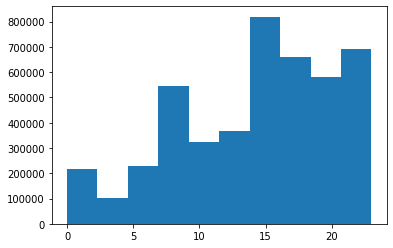

In [14]:
plt.hist(df1['hours']);

In [15]:
months=df1['month'].unique()

In [16]:
for i,month in enumerate(df1['month'].unique()):
    print(i)
    print(month)

0
8
1
7
2
6
3
5
4
9
5
4


<Figure size 2880x1440 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

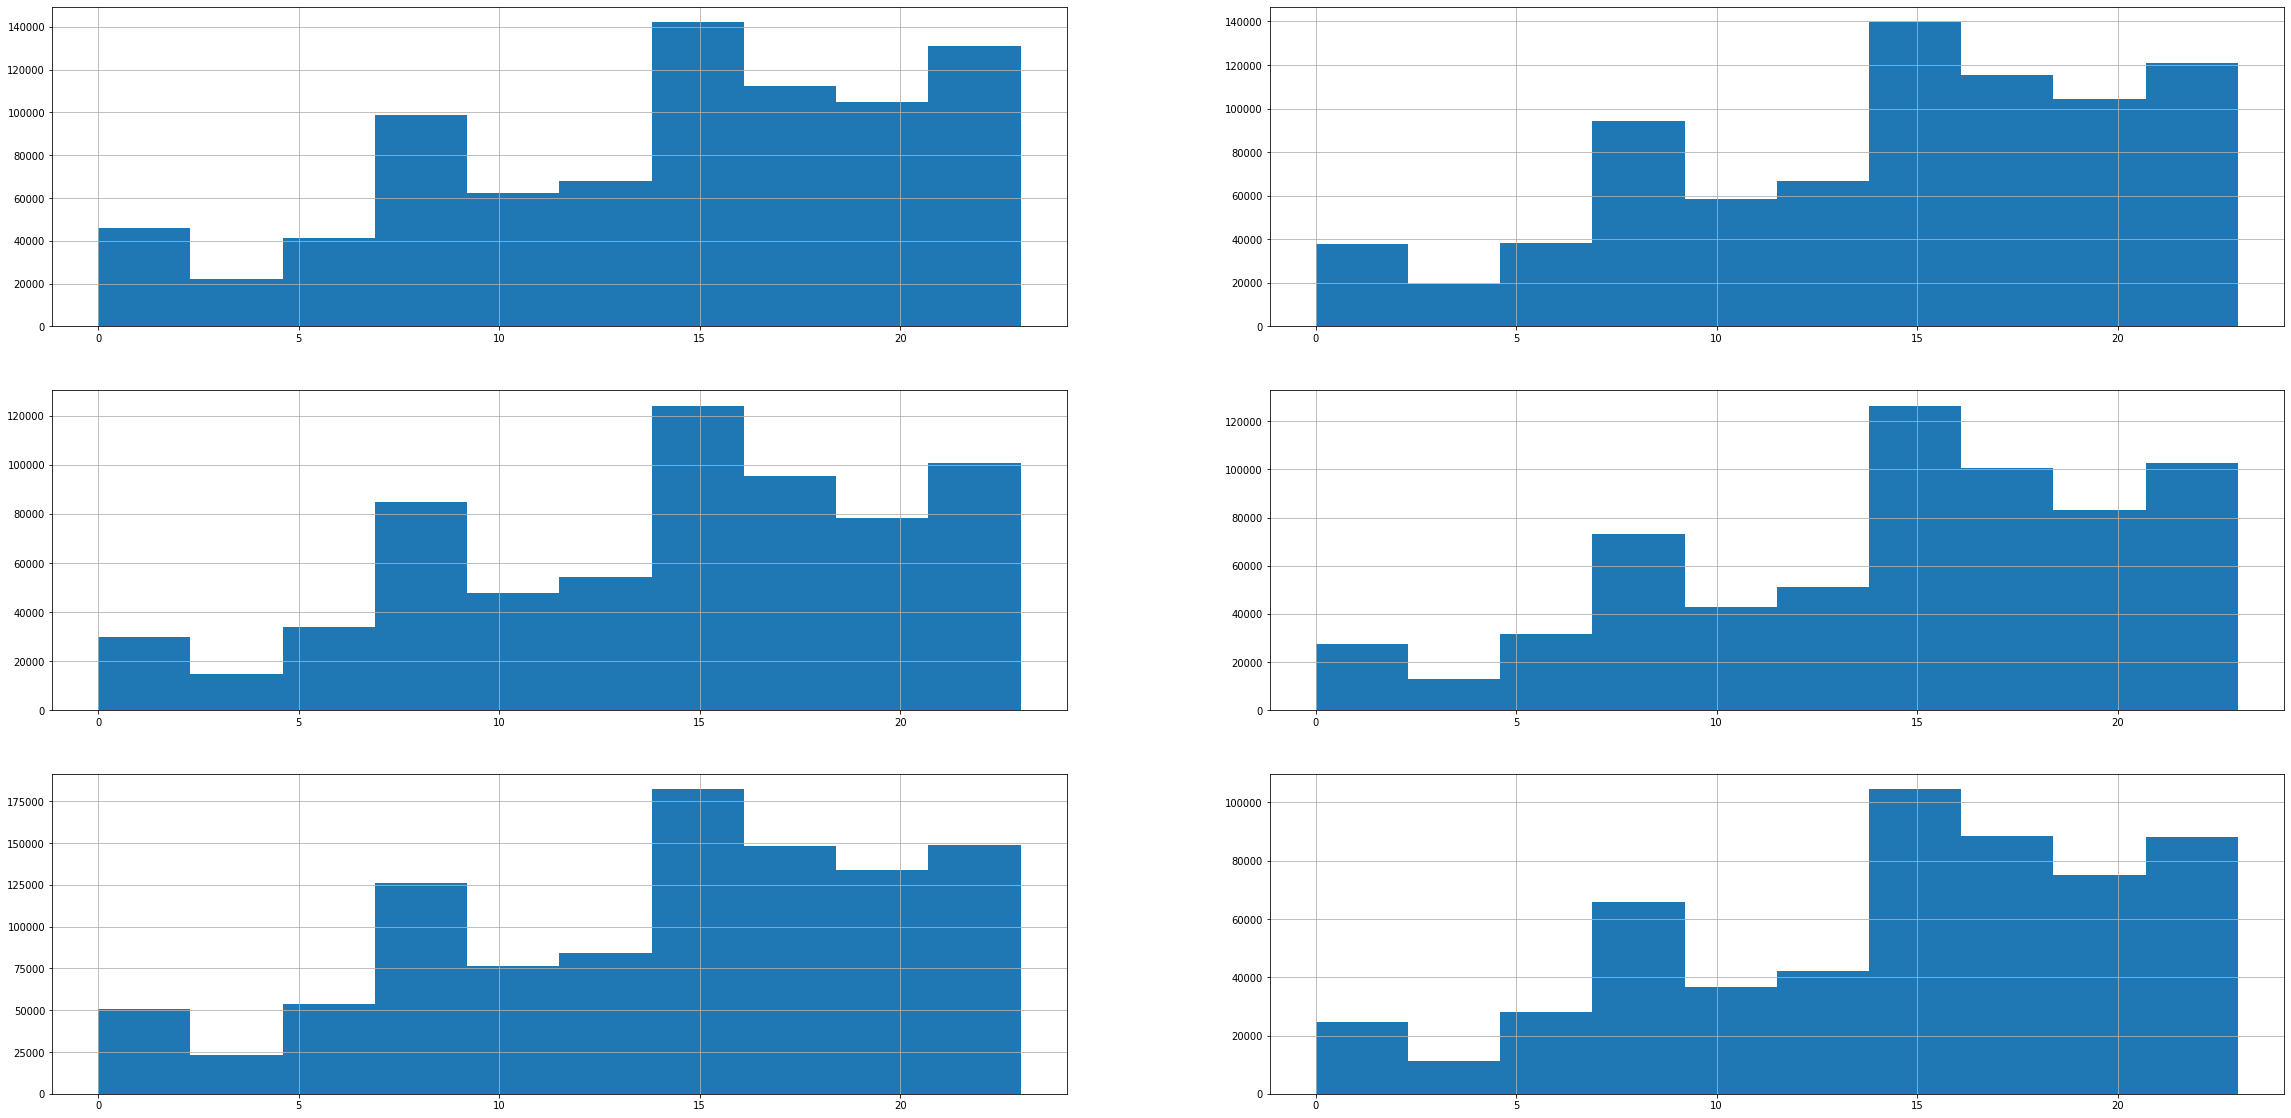

In [17]:
plt.figure(figsize=(40,20))
for i,month in enumerate(df1['month'].unique()):
    plt.subplot(3,2,i+1)
    df1[df1['month']==month]['hours'].hist();

# Analysis of which month has maximum rides

In [18]:
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot


In [19]:
df1.groupby('month')['hours'].count()


month
4     564516
5     652435
6     663844
7     796121
8     829275
9    1028136
Name: hours, dtype: int64

In [20]:
trace1=go.Bar(
    x=df1.groupby('month')['hours'].count().index,
    y=df1.groupby('month')['hours'].count(),
    name='Priority'
)


In [21]:

iplot([trace1])

## Analysis of journey of each day

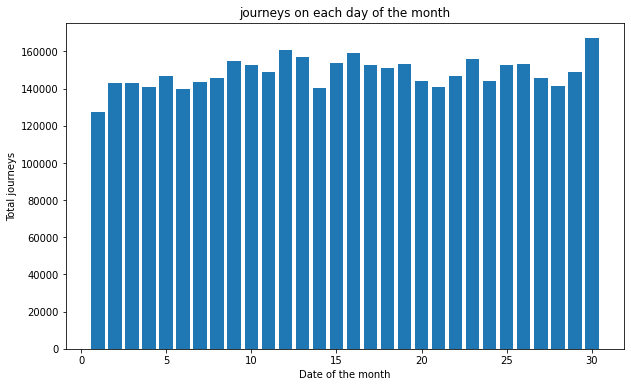

In [22]:
plt.figure(figsize=(10,6))
plt.hist(df1['day'],bins=30,rwidth=0.8,range=(0.5,30.5))
plt.xlabel('Date of the month')
plt.ylabel('Total journeys')
plt.title('journeys on each day of the month');

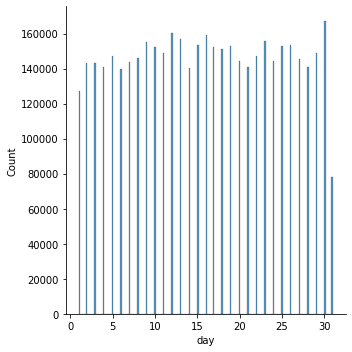

In [23]:
sns.displot(df1['day']);

## Analysis of total rides per month

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:>

(array([ 84177.,  83541.,  89456.,  72862.,  89219.,  69399.,  85093.,
         78645.,  73661., 103222.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'days in month 8')

Text(0, 0.5, 'total rides')

<AxesSubplot:>

(array([ 69305.,  36481.,  71860.,  85229.,  82277.,  89177.,  70516.,
         95152.,  80273., 115851.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'days in month 7')

Text(0, 0.5, 'total rides')

<AxesSubplot:>

(array([56144., 75885., 59882., 78434., 65045., 64232., 72805., 54836.,
        79871., 56710.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'days in month 6')

Text(0, 0.5, 'total rides')

<AxesSubplot:>

(array([69844., 51077., 75789., 54921., 68017., 71295., 62683., 67918.,
        38047., 92844.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'days in month 5')

Text(0, 0.5, 'total rides')

<AxesSubplot:>

(array([ 81423., 121199.,  95054., 111889., 100781., 111897., 108501.,
         89929., 115175.,  92288.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'days in month 9')

Text(0, 0.5, 'total rides')

<AxesSubplot:>

(array([52721., 59680., 52581., 58631., 45427., 56764., 38781., 60673.,
        64697., 74561.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'days in month 4')

Text(0, 0.5, 'total rides')

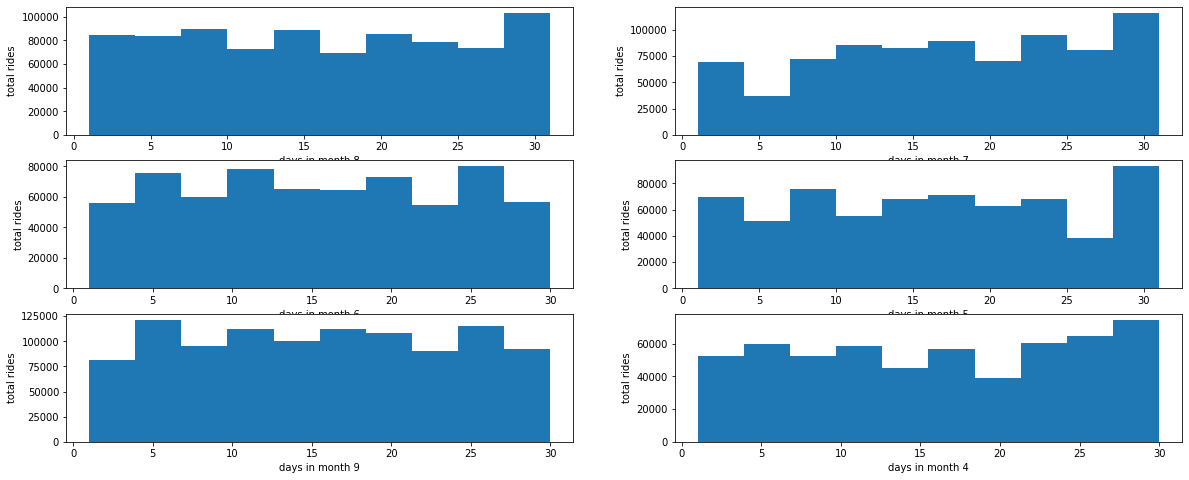

In [24]:
plt.figure(figsize=(20,8))
for i,month in enumerate(df1['month'].unique(),1):
    plt.subplot(3,2,i)
    df1_out=df1[df1['month']==month]
    plt.hist(df1_out['day'])
    plt.xlabel('days in month {}'.format(month))
    plt.ylabel('total rides');


## Analysis of rush in hour

Text(0.5, 1.0, 'Hours of day vs latitude of passenger')

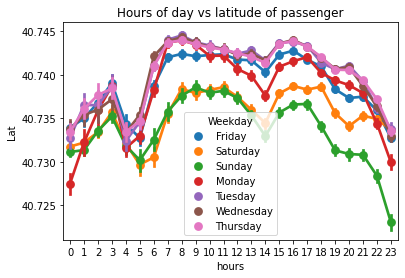

In [27]:
ax=sns.pointplot(x='hours',y='Lat',data=df1,hue='Weekday')
ax.set_title('Hours of day vs latitude of passenger')

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 564515
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Weekday    object        
 5   day        int64         
 6   minute     int64         
 7   month      int64         
 8   hours      int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 378.2+ MB
